<p>Example script to extract 1 month of hourly MLST MSG product over a domain</p>

In [1]:
import datetime as dt 
import thredds_lsasaf_utils as tlu

In [2]:
# Change here your user credentials
server_user="xxx"
server_passwd="xxx"

# Change here the product details 
# Go to https://thredds.lsasvcs.ipma.pt/thredds/catalog/catalog.html
# Navigate selecting satelite, product, format, and data to find the product_path and product file name 
# This is an example for the MSG MLST
product_path="/MSG/MLST/NETCDF/"
product_fname="NETCDF4_LSASAF_MSG_LST_MSG-Disk"
NcvarsLoad=['LST'] # list of netcdf variables to load from remote files 
# time period to process 
dstart=dt.datetime(2022,7,1,0,0,0) #start slot 
dend=dt.datetime(2022,7,31,23,0,0)   # end slot 
product_freq="h" # hourly frequency 

## Define latitude/longitude domain to load [lat_min,lat_max,lon_min,lon_max,]
LatLonBox = [36,44,-10,3] # example for Iberian Peninsula 

In [3]:
# Initialize product details

product = tlu.lsa_product(product_path,product_fname)
product.user = server_user
product.passwd = server_passwd


# list of slots to be processed:
slot_list = tlu.gen_slot_list(dstart,dend,product_freq)
print(f"Will load:{len(slot_list)} files: {slot_list[0]} to {slot_list[-1]}")

# Load data 
ds_full = tlu.load_product_slots_domain(product,slot_list,NcvarsLoad,LatLonBox=LatLonBox)


Will load:744 files: 2022-07-01 00:00:00 to 2022-07-31 23:00:00


Processing 2022-07-31 23:00:00: 100%|████████████████████████████████████████████████| 744/744 [03:53<00:00,  3.18it/s]


Loaded 743 out of 744 slots with dims: Frozen({'time': 743, 'lat': 161, 'lon': 261}) in 234.84 seconds 


<xarray.Dataset>
Dimensions:  (time: 743, lat: 161, lon: 261)
Coordinates:
  * lat      (lat) float32 44.0 43.95 43.9 43.85 43.8 ... 36.15 36.1 36.05 36.0
  * lon      (lon) float32 -10.0 -9.95 -9.9 -9.85 -9.8 ... 2.8 2.85 2.9 2.95 3.0
  * time     (time) datetime64[ns] 2022-07-01 ... 2022-07-31T23:00:00
Data variables:
    LST      (time, lat, lon) float32 nan nan nan nan ... 26.7 26.0 26.34 24.85
Attributes: (12/31)
    references:                      Data provided by the EUMETSAT Satellite ...
    easternmost_longitude:           -80.0
    westernmost_longitude:           80.0
    spatial_resolution:               0.05x 0.05
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_resolution:        0.05
    geospatial_lon_resolution:        0.05
    northernmost_latitude:           80.0
    southernmost_latitude:           -80.0
    DODS.strlen:                     0
    DODS_EXTRA.Unlimited_Dimension:  time

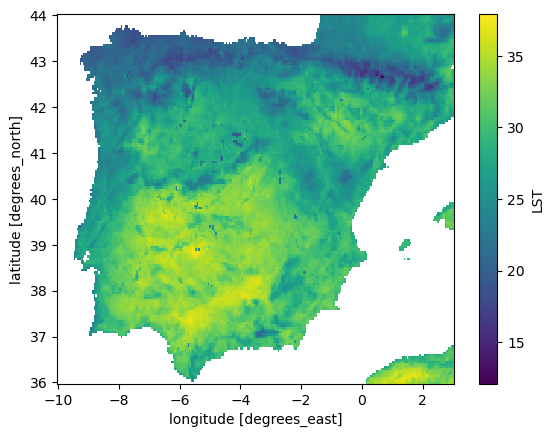

In [4]:
## plot map with temporal mean 
ds_full.mean(dim='time')[NcvarsLoad[0]].plot.imshow()

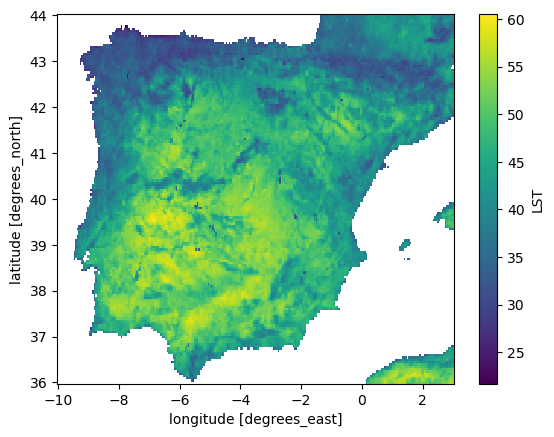

In [5]:
## plot map with mean daily maximum 
ds_full[NcvarsLoad[0]].groupby('time.hour').mean('time').max(dim='hour').plot.imshow()

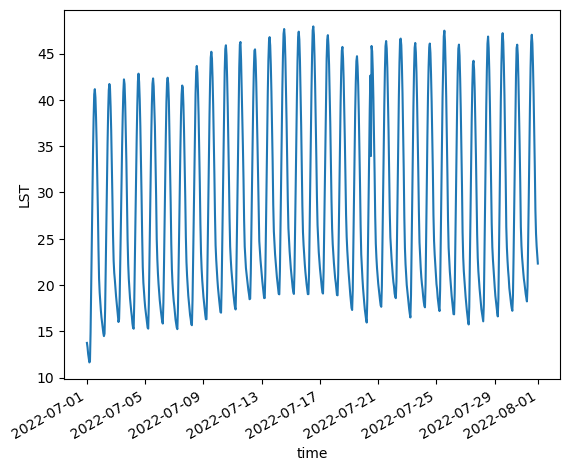

In [6]:
## plot temporal evolution, mean over the region
ds_full.mean(dim=['lat','lon'])[NcvarsLoad[0]].plot()

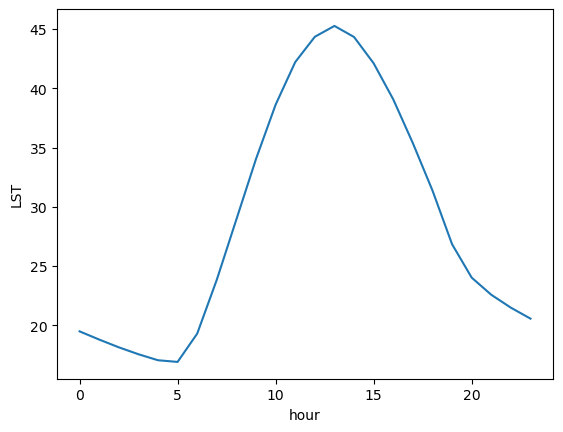

In [7]:
## plot mean diurnal cycle 
ds_full.mean(dim=['lat','lon'])[NcvarsLoad[0]].groupby('time.hour').mean('time').plot()